In [ ]:
boards = [
         [[1, 0, 0, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 0, 1, 0]],

         [[0, 1, 0, 0],
          [0, 0, 1, 0],
          [0, 1, 0, 0],
          [0, 1, 0, 0]],

         [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [0, 1, 0, 0],
          [0, 0, 0, 1]],

         [[0, 0, 0, 1],
          [0, 1, 0, 0],
          [0, 0, 0, 1],
          [0, 0, 1, 0]]
         ]

max_fitness = len(boards[0][0]) * (len(boards[0]) - 1)

def calculate_attack(board):
  attack = 0
  for r in range(len(board)):
    for c in range(len(board[r])):
      if board[r][c] == 1:
        attack += calculate_attack_for_cell(board, r, c)
  return attack

def calculate_attack_for_cell(board, r, c):
  attack = 0
  for r2 in range(len(board)):
    for c2 in range(len(board[r2])):
      if board[r2][c2] == 1:
        if r == r2 and c == c2:
          continue
        if r == r2 or c == c2 or r-c == r2-c2 or r+c == r2+c2:
          attack += 1
  return attack

print(calculate_attack(boards[0]))
print(calculate_attack(boards[1]))
print(calculate_attack(boards[2]))
print(calculate_attack(boards[3]))

8
10
8
4


In [ ]:
import random

def calculate_fitness(boards, max_fitness):
  fitness = []
  for board in boards:
    fitness.append(max_fitness - calculate_attack(board) + 1)
  return fitness

def select_parents(boards, fitness):
  while True:
    choices = random.choices(population=range(len(boards)), weights=fitness, k=2)
    if choices[0] != choices[1]:
      break
  return choices

select_parents(boards, calculate_fitness(boards, max_fitness))

[1, 3]

In [ ]:
import copy

def cross_over_parents(boards, parents):
  split_location = random.choice(range(len(boards[0])-1)) + 1
  nextgen_boards = copy.deepcopy([boards[parents[0]], boards[parents[1]]])

  temp = nextgen_boards[0][split_location:].copy()
  nextgen_boards[0][split_location:] = nextgen_boards[1][split_location:]
  nextgen_boards[1][split_location:] = temp

  return nextgen_boards

cross_over_parents(boards, [0, 1])

[[[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0]],
 [[0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]]]

In [ ]:
def apply_mutation(boards, probability):
  mutated_boards = copy.deepcopy(boards)
  for board in mutated_boards:
    if random.random() < probability:
      row = random.choice(range(len(board)))
      for i in range(len(board[0])):
        board[row][i] = 0

      col = random.choice(range(len(board[0])))
      board[row][col] = 1

  return mutated_boards

print(apply_mutation(boards, 1))

[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]], [[0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0]], [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0]], [[0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]]


In [ ]:
def run_evolution(boards, fitness):
  next_generation = []
  while len(next_generation) < len(boards):
    parents = select_parents(boards, fitness)
    children = cross_over_parents(boards, parents)
    next_generation.append(children[0])
    next_generation.append(children[1])

  next_generation = apply_mutation(next_generation, 0.1)
  return next_generation

# import matplotlib.pyplot as plt

def main(boards):
  # performanceImprovement = []
  # epochs = 0

  for i in range(500):
    fitness = calculate_fitness(boards, max_fitness)
    # performanceImprovement.append(max(fitness))
    # epochs += 1

    if(max(fitness) > max_fitness):
      print("epoch", i)
      break
    boards = run_evolution(boards, fitness)

  print(fitness)
  print(boards)

  # plt.plot([i for i in range(epochs)], performanceImprovement)
  # plt.show()


main(boards)

epoch 181
[11, 11, 11, 13]
[[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]], [[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]], [[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]], [[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0]]]


epoch 110
[47, 53, 51, 53, 49, 57, 53, 53]
[[[0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0]], [[0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0]], [[0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0]], [[0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0]], [[0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0

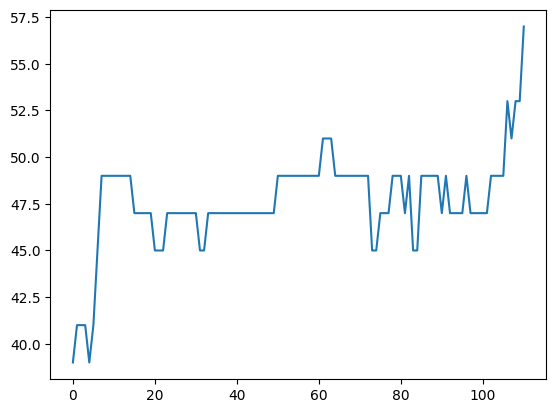

In [ ]:
boards2 = [
         [[1, 0, 0, 0, 0, 0, 0, 0],
          [1, 0, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [1, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0]],

         [[0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 1],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0]],

         [[0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0]],

         [[0, 0, 0, 0, 0, 1, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0]],

         [[1, 0, 0, 0, 0, 0, 0, 0],
          [1, 0, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [1, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0]],

         [[0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 1],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0]],

         [[0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0]],

         [[0, 0, 0, 0, 0, 1, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0]]
         ]

max_fitness2 = len(boards2[0][0]) * (len(boards2[0]) - 1)

import matplotlib.pyplot as plt

def main2(boards):
  performanceImprovement = []
  epochs = 0

  for i in range(5000):
    fitness = calculate_fitness(boards, max_fitness2)
    performanceImprovement.append(max(fitness))
    epochs += 1

    if(max(fitness) > max_fitness2):
      print("epoch", i)
      break
    boards = run_evolution(boards, fitness)

  print(fitness)
  print(boards)

  plt.plot([i for i in range(epochs)], performanceImprovement)
  plt.show()

main2(boards2)
